In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from spacepy.pycdf import CDF as cdf
from scipy.stats import pearsonr
plt.rcParams["text.usetex"] = True

In [2]:
df1 = cdf("../Data_Raw/psp_esa_data/2018/psp_swp_spi_sf00_l3_mom_20181011_v04.cdf")
df1.keys

<bound method Mapping.keys of <CDF:
APID: CDF_UINT2 [38]
ARCH_BITS: CDF_UINT1 [38]
CNTS: CDF_FLOAT [38]
COMPR_RATIO: CDF_FLOAT [38]
DATASIZE: CDF_UINT4 [38]
DENS: CDF_FLOAT [38]
EFLUX_VS_ENERGY: CDF_FLOAT [38, 32]
EFLUX_VS_PHI: CDF_FLOAT [38, 8]
EFLUX_VS_THETA: CDF_FLOAT [38, 8]
ENERGY_VALS: CDF_FLOAT [38, 32]
Epoch: CDF_TIME_TT2000 [38]
F0: CDF_UINT2 [38]
GAP: CDF_UINT1 [38]
LTCSNNNN_BITS: CDF_UINT1 [38]
MAGF_INST: CDF_FLOAT [38, 3]
MAGF_SC: CDF_FLOAT [38, 3]
MET: CDF_DOUBLE [38]
MODE2: CDF_UINT2 [38]
MODE2_ORI: CDF_UINT2 [38]
NDAT: CDF_UINT4 [38]
NUM_ACCUM: CDF_UINT4 [38]
NUM_TOTAL: CDF_UINT4 [38]
PEAK_BIN: CDF_UINT1 [38]
PHI_VALS: CDF_FLOAT [38, 8]
PKT_SIZE: CDF_UINT4 [38]
PRODUCT_BITS: CDF_UINT1 [38]
QUALITY_FLAG: CDF_UINT2 [38]
QUAT_SC_TO_RTN: CDF_DOUBLE [38, 4]
ROTMAT_SC_INST: CDF_FLOAT [3, 3] NRV
SC_VEL_RTN_SUN: CDF_DOUBLE [38, 3]
SEQN: CDF_UINT2 [38]
SEQN_DELTA: CDF_UINT2 [38]
SEQN_GROUP: CDF_UINT1 [38]
SOURCE_APID: CDF_UINT2 [38]
SOURCE_HASH: CDF_UINT4 [38]
STATUS_BITS: CDF_UI

In [3]:
df_esa = pd.read_hdf("../Data_Processed/Individual/psp_esa_data/psp_esa_data_unbinned_20181002_20241031.hf")

Text(0.5, 1.0, 'Hour Averaged ESA Data')

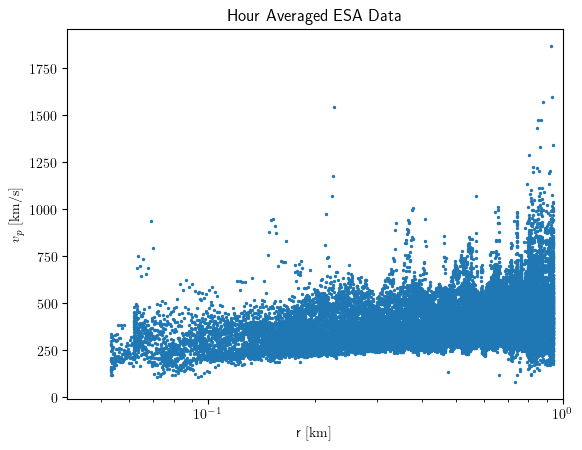

In [4]:
plt.scatter((df_esa["sc_r"] / 1.496e8), df_esa["vp_m"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7 / 1.496e8, 1.5e8 / 1.496e8)
plt.title(r"Hour Averaged ESA Data")

In [5]:
df_spc = pd.read_hdf("../Data_Processed/Individual/psp_spc_data/psp_spc_data_unbinned_20181031_20241031.hf")

Text(0.5, 1.0, 'Hour Averaged SPC Data')

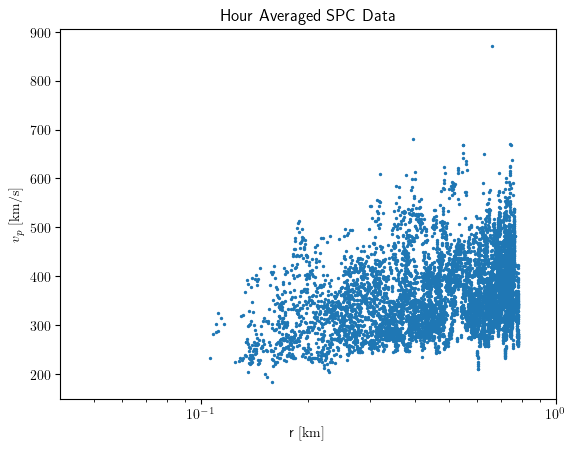

In [6]:
plt.scatter((df_spc["sc_r"] / 1.496e8), df_spc["vp_m"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7 / 1.496e8, 1.5e8 / 1.496e8)
plt.title(r"Hour Averaged SPC Data")

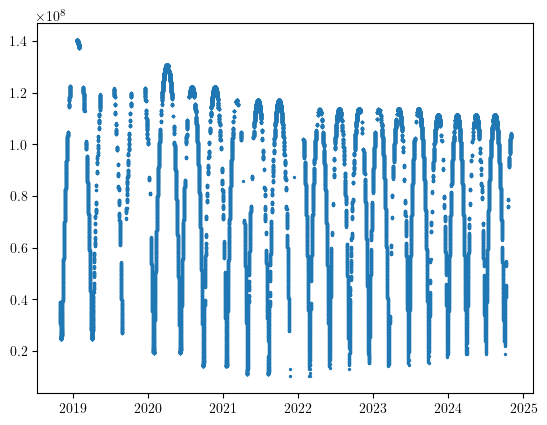

In [7]:
plt.scatter(df_spc["Epoch"], df_spc["sc_r"], s = 2)

In [8]:
for i in range(len(df_spc["Epoch"])):
    print(df_spc["Epoch"][i], df_esa["Epoch"][i])

2018-10-30 23:59:59.534329088 2018-10-02 04:31:59.108509696
2018-10-31 00:44:08.756224 2018-10-02 05:30:00.380007680
2018-10-31 01:30:02.334326528 2018-10-02 06:29:53.504331264
2018-10-31 02:12:58.665908992 2018-10-02 07:30:00.611147264
2018-10-31 03:34:01.221349376 2018-10-02 08:30:07.718464512
2018-10-31 04:29:59.632992256 2018-10-02 09:30:00.844937984
2018-10-31 05:29:59.751928832 2018-10-02 10:29:53.971563776
2018-10-31 06:29:59.870800384 2018-10-02 11:30:01.079332608
2018-10-31 07:29:59.989647104 2018-10-02 12:30:08.187154944
2018-10-31 08:30:00.108428800 2018-10-02 13:30:01.313969408
2018-10-31 09:30:00.227154432 2018-10-02 14:29:54.440802048
2018-10-31 10:30:00.345924096 2018-10-02 15:30:01.548684544
2018-10-31 11:30:00.027843072 2018-10-02 16:23:37.187506688
2018-10-31 12:29:59.709786880 2018-10-03 01:58:53.808104960
2018-10-31 13:29:59.828648192 2018-10-03 02:30:07.259297792
2018-10-31 14:29:59.947508992 2018-10-03 03:30:00.378854656
2018-10-31 15:30:00.066364416 2018-10-03 04

In [9]:
df_spc_clean = df_spc.dropna(subset=["Epoch"]).sort_values("Epoch")
df_esa_clean = df_esa.dropna(subset=["Epoch"]).sort_values("Epoch")
df_merged = pd.merge_asof(
    df_spc_clean.sort_values('Epoch'),
    df_esa_clean.sort_values('Epoch'),
    on='Epoch',
    direction='nearest',         
    tolerance=pd.Timedelta('30m'),
    suffixes = ("_spc", "_esa") 
)

print(df_merged)

       ssepoch_spc                         Epoch      np_spc    vp_m_spc  \
0       1540940400 2018-10-30 23:59:59.534329088  154.429123  317.398376   
1       1540944000 2018-10-31 00:44:08.756224000  155.399333  318.824689   
2       1540947600 2018-10-31 01:30:02.334326528  138.326169  318.969282   
3       1540951200 2018-10-31 02:12:58.665908992  146.511221         inf   
4       1540954800 2018-10-31 03:34:01.221349376  183.321841  335.494389   
...            ...                           ...         ...         ...   
32314   1730401200 2024-10-31 19:29:58.678006784         NaN         inf   
32315   1730404800 2024-10-31 20:30:05.787666176         NaN         inf   
32316   1730408400 2024-10-31 21:29:58.916204800         NaN         inf   
32317   1730412000 2024-10-31 22:29:52.044699904         NaN         inf   
32318   1730415600 2024-10-31 23:29:45.173236480         NaN         inf   

             Tp_spc      sc_r_spc   ssepoch_esa         bm     np_esa  \
0      4.99459

In [10]:
df_clean = df_merged[np.isfinite(df_merged["vp_m_spc"]) & np.isfinite(df_merged["vp_m_esa"])]

Text(0.5, 1.0, 'ESA Merged Data')

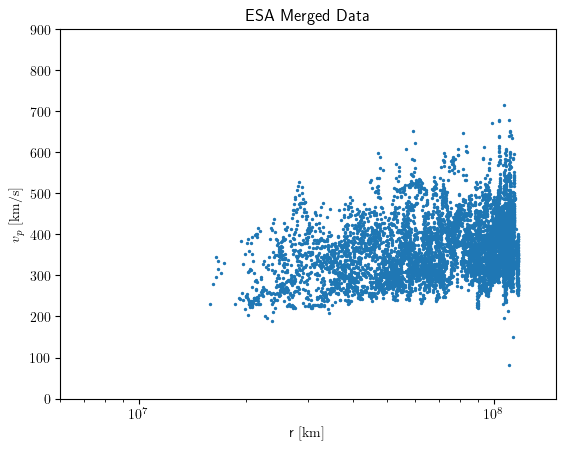

In [11]:
plt.scatter(df_clean["sc_r_esa"], df_clean["vp_m_esa"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7, 1.5e8)
plt.ylim(0,900)
plt.title(r"ESA Merged Data")

Text(0.5, 1.0, 'SPC Merged Data')

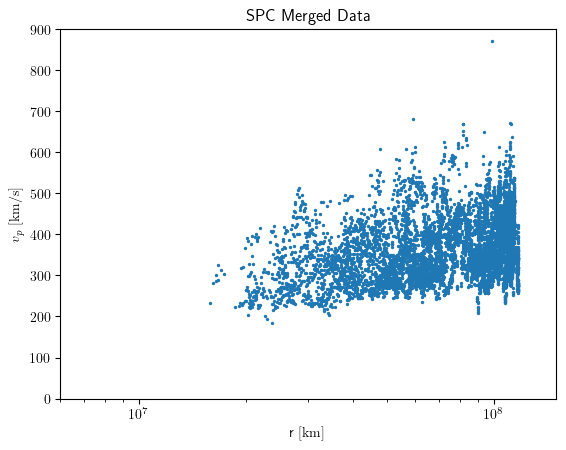

In [12]:
plt.scatter(df_clean["sc_r_spc"], df_clean["vp_m_spc"], s = 2)
plt.xscale("log")
plt.ylabel(r"$v_p~\rm [km/s]$")
plt.xlabel(r"r \rm [km]")
plt.xlim(.6e7, 1.5e8)
plt.ylim(0,900)
plt.title(r"SPC Merged Data")

Pearson r correlation coefficient =  0.9524882969738495


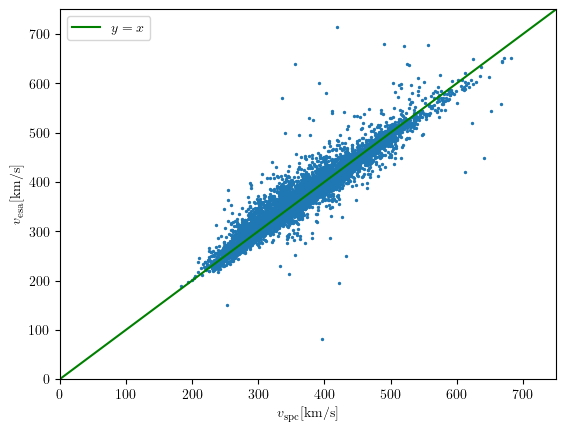

In [13]:
plt.plot(np.linspace(0,900,300), np.linspace(0,900,300), c = "g")
plt.legend([r"$y=x$"])
plt.scatter(df_clean["vp_m_spc"], df_clean["vp_m_esa"], s = 2)
plt.xlabel(r"$v_{\rm spc} \rm [km/s]$")
plt.ylabel(r"$v_{\rm esa} \rm [km/s]$")
plt.xlim(0,750)
plt.ylim(0,750)
print("Pearson r correlation coefficient = ", pearsonr(df_clean["vp_m_spc"], df_clean["vp_m_esa"])[0])


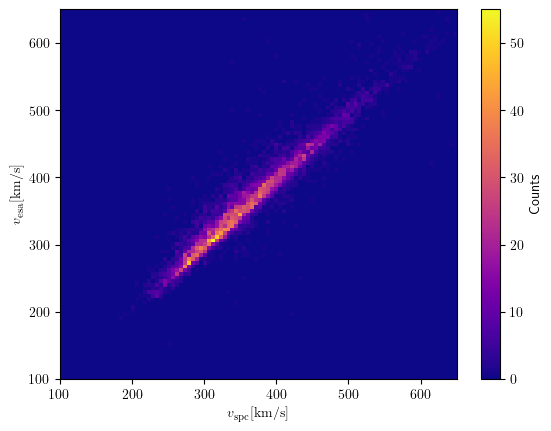

In [14]:
plt.hist2d(df_clean["vp_m_spc"], df_clean["vp_m_esa"], bins=100, cmap="plasma", range=[[100,650],[100,650]])
plt.xlabel(r"$v_{\rm spc} \rm [km/s]$")
plt.ylabel(r"$v_{\rm esa} \rm [km/s]$")
plt.colorbar(label="Counts")
plt.xlim(100,650)
plt.ylim(100,650)
#plt.plot(np.linspace(0,900,300), np.linspace(0,900,300), c = "g",)
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)

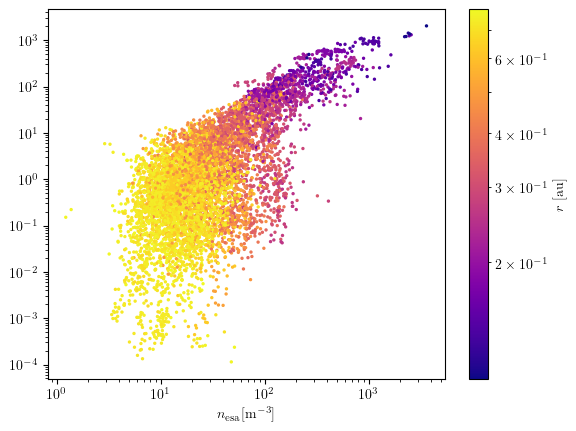

In [15]:

plt.scatter(df_clean["np_spc"], df_clean["np_esa"], s = 2, c = df_clean["sc_r_spc"] / 1.496e8, cmap="plasma", norm="log")
plt.colorbar(label = r"$r~\rm [au]$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$n_{\rm spc} \rm [m^{-3}]$")
plt.xlabel(r"$n_{\rm esa} \rm [m^{-3}]$")
plt.xlim("")


C:\Users\carso\AppData\Local\Temp\ipykernel_22720\1956675276.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1e3)
C:\Users\carso\AppData\Local\Temp\ipykernel_22720\1956675276.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1e3)


(np.float64(3.553037444745877), 1000.0)

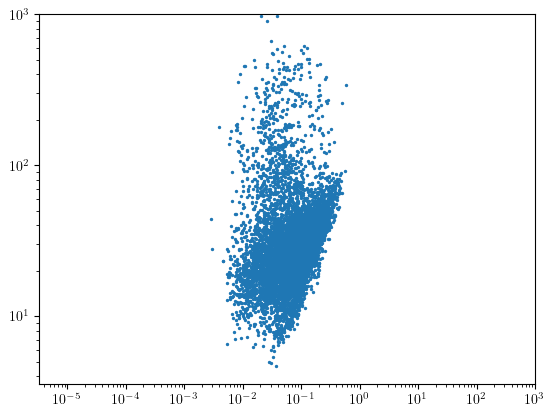

In [17]:
plt.scatter(df_clean["Tp_spc"], df_clean["Tp_esa"], s = 2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(0,1e3)
plt.ylim(0,1e3)